Problemas cap 7 Movimento oscilatório harmónico simples 7. Uma mola exerce uma força $F_x=-kx(t)$ , em que $k$ é a constante elástica da mola, num corpo de massa $m$.
Considere $k=1$ N/m e $m=1$ kg.


a) Calcule numericamente a lei do movimento, no caso em que a velocidade inicial é nula e a posição inicial 4 m.


In [119]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [120]:
# Variables

k = 1
m = 1

In [121]:
# Time

time_step = 0.0001
t_start = 0
t_end = 100
n = int((t_end - t_start) / time_step)
time = np.zeros(n)

In [122]:
def spring_force(r, v, a):
    return -k * r

In [123]:
# Arrays

r = np.zeros(n)
v = np.zeros(n)
a = np.zeros(n)

# Initial conditions

r[0] = 4
v[0] = 0
a[0] = spring_force(r[0], v[0], a[0]) / m

In [124]:
# Euler cromer

for i in range(n - 1):
    time[i + 1] = time[i] + time_step
    a[i] = spring_force(r[i], v[i], a[i]) / m
    v[i + 1] = v[i] + a[i] * time_step
    r[i + 1] = r[i] + v[i + 1] * time_step

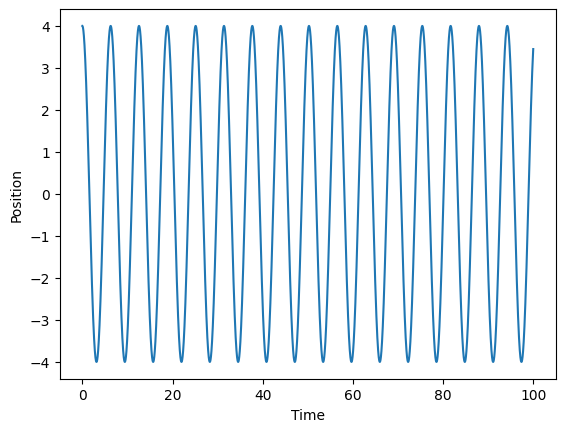

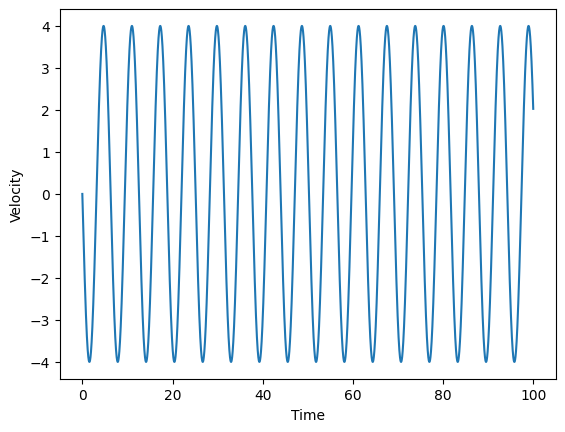

In [125]:
# Graph

plt.plot(time, r)
plt.xlabel("Time")
plt.ylabel("Position")
plt.show()

plt.plot(time, v)
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.show()

b) Calcule a amplitude do movimento e o seu período, usando interpolação dos resultados numéricos


In [126]:
amplitude = np.max(abs(r))
print("The amplitude is:", amplitude, "m")

The amplitude is: 4.000000004995872 m


In [127]:
def find_local_minimums_index(r):
    return [i for i in range(1, n - 2) if r[i - 1] > r[i] < r[i + 1]]

In [128]:
local_minimums = find_local_minimums_index(r)
period = time[local_minimums[1]] - time[local_minimums[0]]
print(time[local_minimums[0]])
print("The period is:", period, "s")

3.141500000002205
The period is: 6.283199999989169 s


c) Compare a amplitude e o período obtidos numericamente com os valores teóricos. Concordam?

Sim


d) Calcule a energia mecânica. É constante ao longo do tempo?


In [129]:
# Mechanical energy


def mechanical_energy(r, v):
    kinetic_energy = 0.5 * m * v**2
    potential_energy = 0.5 * k * r**2
    return kinetic_energy + potential_energy


energy = mechanical_energy(r, v)

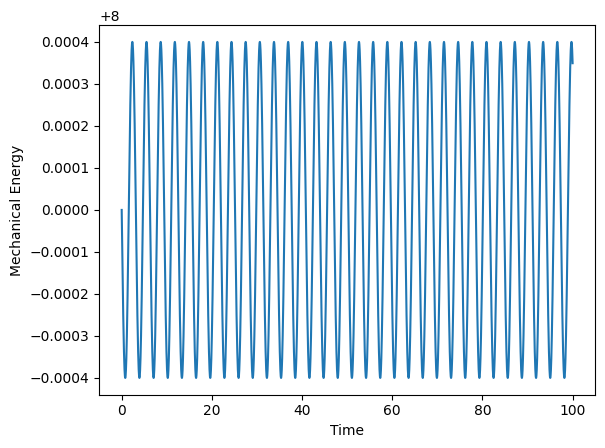

Mechanical Energy: 8.000349368131179 J


In [130]:
# Plot energy

plt.plot(time, energy)
plt.xlabel("Time")
plt.ylabel("Mechanical Energy")
plt.show()

print("Mechanical Energy:", energy[-1], "J")